In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./AAME.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


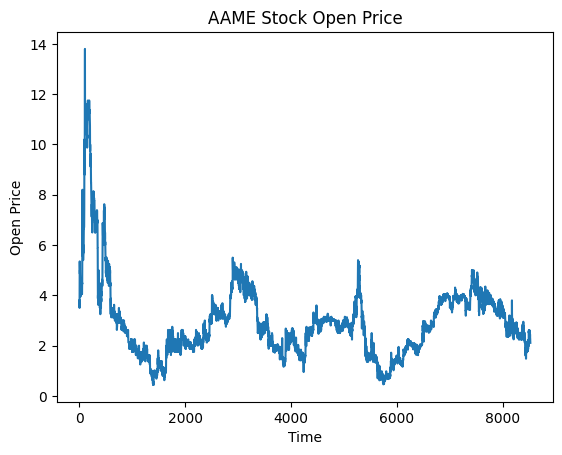

In [5]:
seq_data = data[data['Open'] != 0][['Open']].to_numpy()

plt.plot(seq_data)
plt.title('AAME Stock Open Price')  
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()

In [6]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window]) 
    return np.array(train), np.array(target)


X, y = make_sample(seq_data, 7)

In [7]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)  # 예: (n_samples, 7, 1)


(8519, 7, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mse')
model.summary()


c:\Users\syjwk\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X, y, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3721 - val_loss: 0.0192
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0883 - val_loss: 0.0157
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0327 - val_loss: 0.0152
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0292 - val_loss: 0.0174
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0234 - val_loss: 0.0153
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0242 - val_loss: 0.0155
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0239 - val_loss: 0.0158
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0221 - val_loss: 0.0153
Epoch 9/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0246 - val_loss: 0.0204
Epoch 10/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0227 - val_loss: 0.0191
Epoch 11/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0211 - val_loss: 0.0162
Epoch 12/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


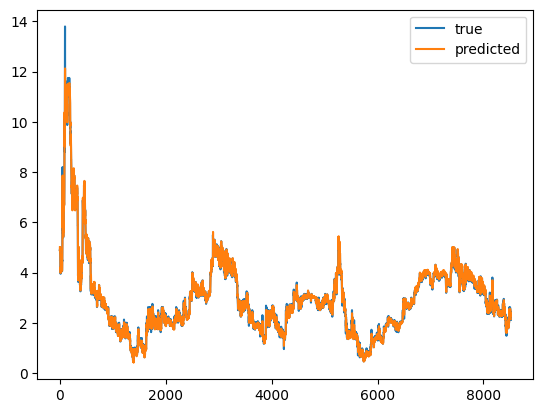

In [10]:
import matplotlib.pyplot as plt

pred = model.predict(X)

plt.plot(y, label='true')
plt.plot(pred, label='predicted')
plt.legend()
plt.show()